In [81]:
# importing libraries

import spacy
from wordcloud import WordCloud
from collections import Counter
from textblob_de import TextBlobDE as TextBlob
import matplotlib.pyplot as plt
import string
import re

import numpy as np
import pandas as pd

In [5]:
# load pre-trained spacy model for german language

nlp = spacy.load("de_core_news_sm")

In [59]:
# file openener and cleaner

def file_openclean(filename):
    with open(filename) as file:
        fi = file.read().split('.')
        f_clean = [re.sub('\\n', '', f) for f in fi]
        return f_clean
    
test_file = file_openclean('learn_file.txt')

In [6]:
# funtion that performs pos-tagging on a string/sentence and returns a list of pos-tags

def pos_tagger(sent):
    doc = nlp(sent)
    pos_tags = [token.tag_ for token in doc]
    return pos_tags

In [7]:
# function that constructs a dictionary with the count of occurences of elements in inputobject

def count_dict(obj_to_count_from):
    c = Counter(obj_to_count_from)
    sort_c = sorted(c.items(), key=lambda x:x[1], reverse=True)
    sort_dict_c = {obj[0]: obj[1] for obj in sort_c}
    return sort_dict_c

In [8]:
# function that searches string for named entities

def recog_ne(sent):
    doc = nlp(sent)
    named_ents = [ent.label_ for ent in doc.ents]
    return named_ents

In [80]:
# function that performs sentiment analysis on a given string and returns polarity

def sent_analysis(sent):
    blob = TextBlob(sent)
    return blob.sentiment[0]

In [113]:
# function that generates a wordcloud from a string by frequency

def make_wc(sent):
    # clean sentence
    cleaned_sent = list(map(lambda x: x.strip(string.punctuation), sent.split()))
    counted_sent = count_dict(cleaned_sent)
    wordcloud = WordCloud(max_font_size=80).generate_from_frequencies(counted_sent)
    return wordcloud

In [118]:
# prepare some data

pos_tag_count = count_dict(pos_tagger(' '.join(test_file)))


# count the named entities

ne = []

for sen in test_file:
    ne += recog_ne(sen)

counted_na_ent = count_dict(ne)


# sent_analysis for whole articel

sent_an = [sent_analysis(sent) for sent in test_file]

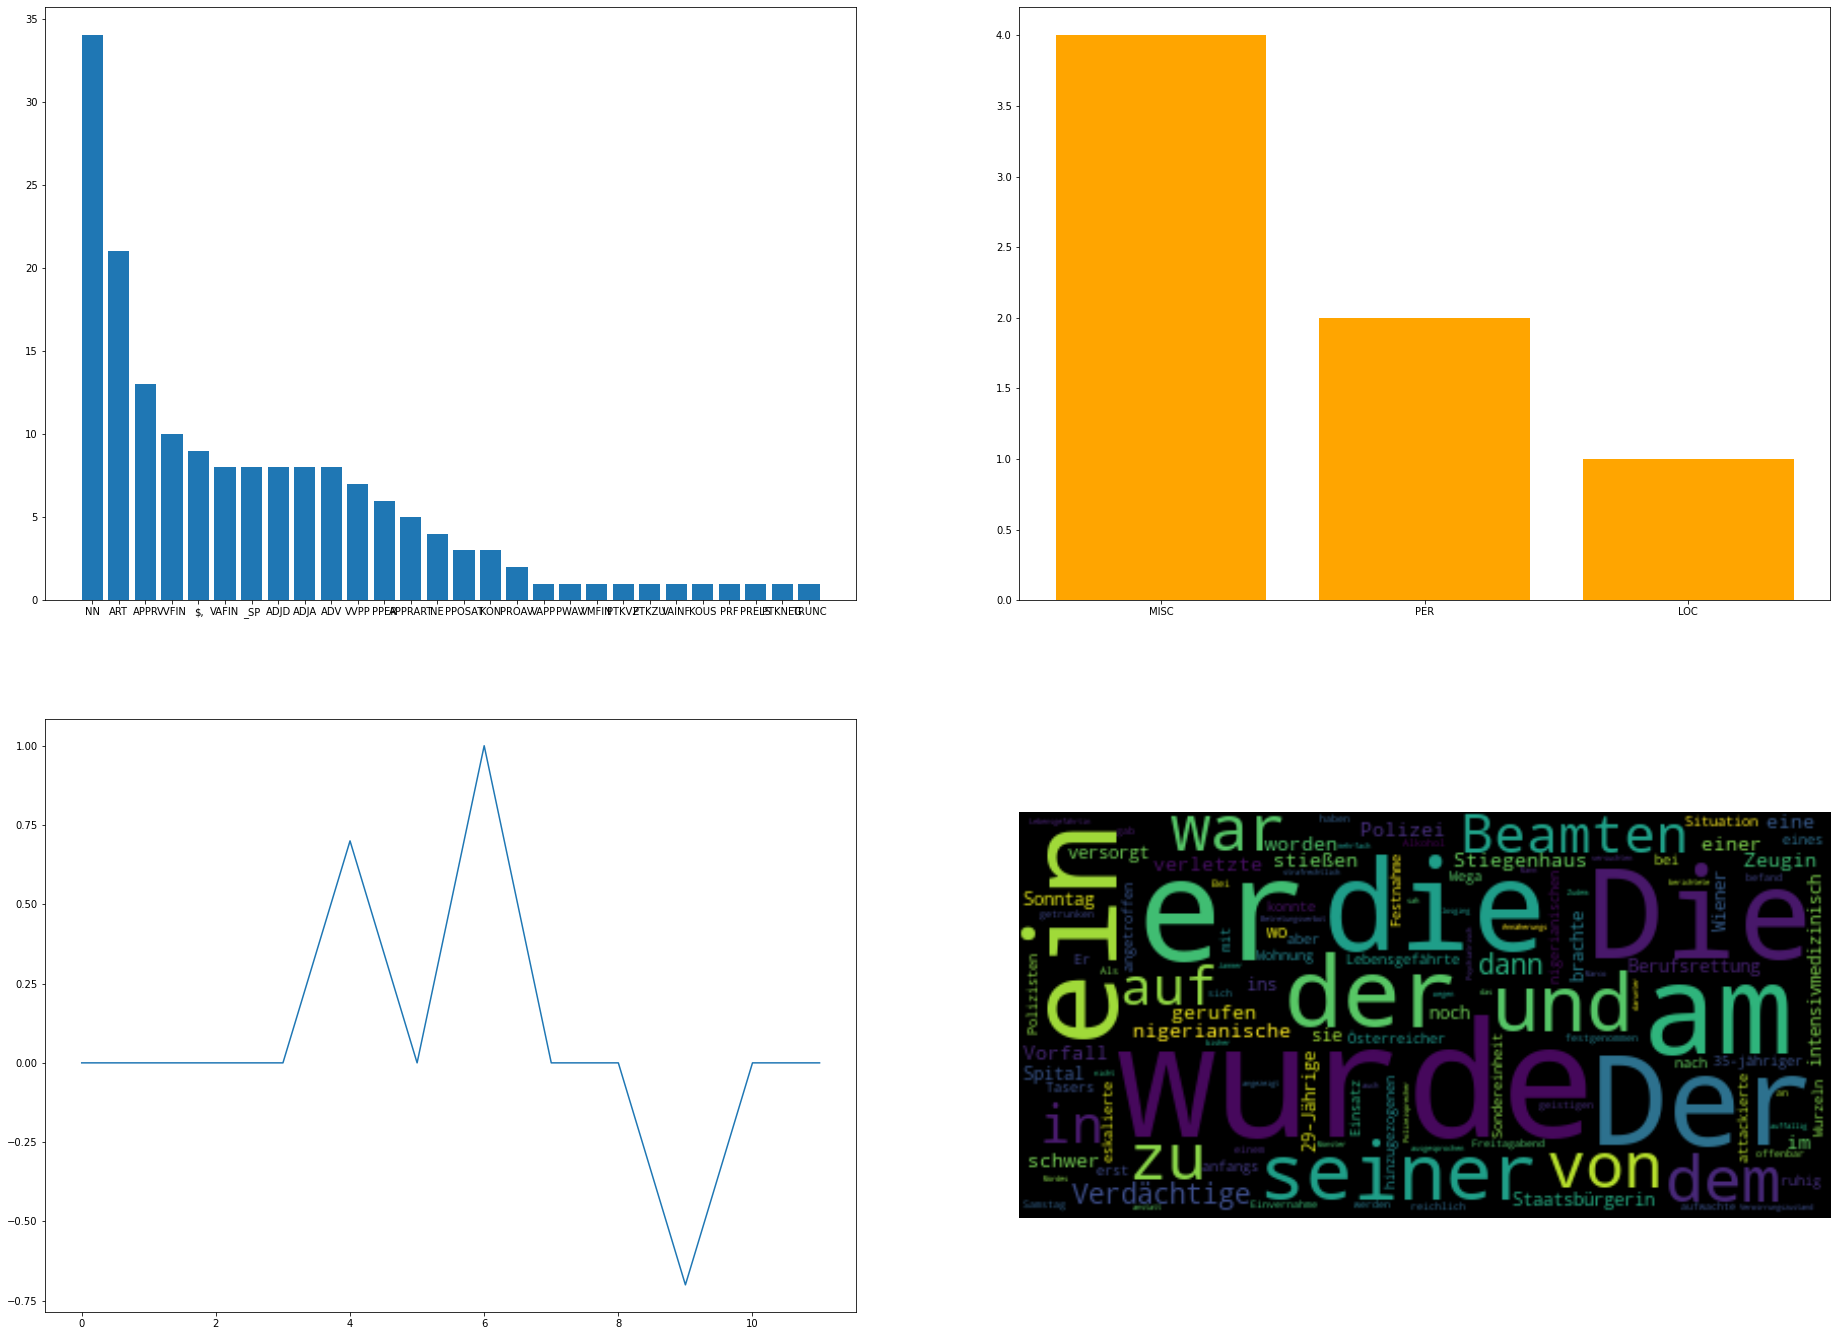

In [119]:
# make a little dashboardlike visualisation


plt.figure(figsize=(32, 24))


plt.subplot(221)
plt.bar(pos_tag_count.keys(), pos_tag_count.values())

plt.subplot(222)
plt.bar(counted_na_ent.keys(), counted_na_ent.values(), color='orange')


plt.subplot(223)
plt.plot(list(range(len(sent_an))), sent_an)


plt.subplot(224)
plt.imshow(make_wc(' '.join(test_file)), interpolation="bilinear")
plt.axis("off")

plt.show()